In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

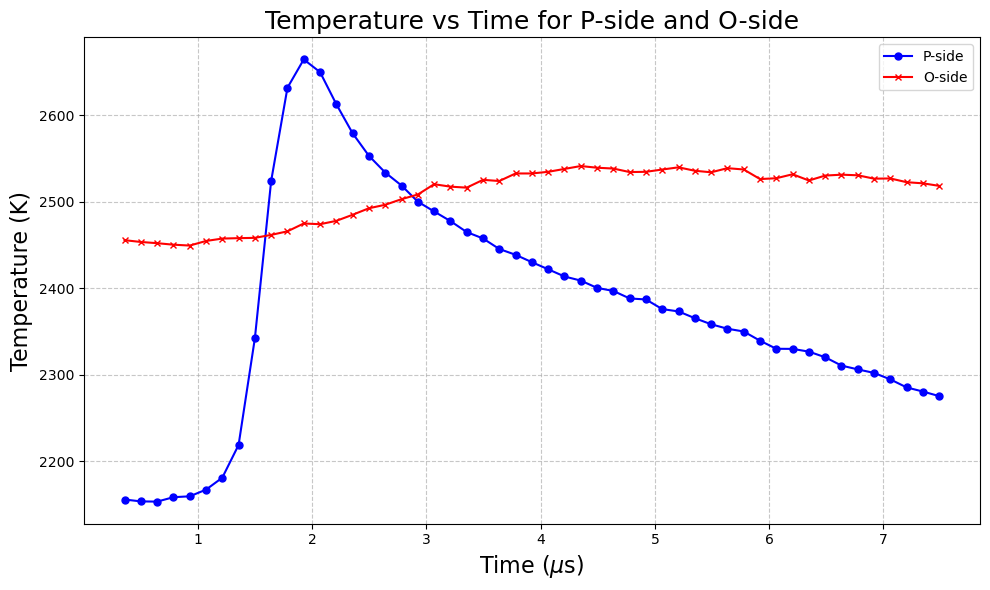

In [14]:
df1 = pd.read_csv('data/experimental/geballe_heat_data.csv')
x_data = df1['time']*10**6
pside = df1['temp']
oside = df1['oside']

fig, ax = plt.subplots(figsize = (10, 6))
ax.plot(x_data, pside, label='P-side', color='blue', marker='o', markersize=5)
ax.plot(x_data, oside, label='O-side', color='red', marker='x', markersize=5)
ax.set_xlabel(r'Time ($\mu$s)', fontsize = 16)
ax.set_ylabel('Temperature (K)', fontsize = 16)
ax.set_title('Temperature vs Time for P-side and O-side', fontsize = 18)
ax.legend()
ax.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

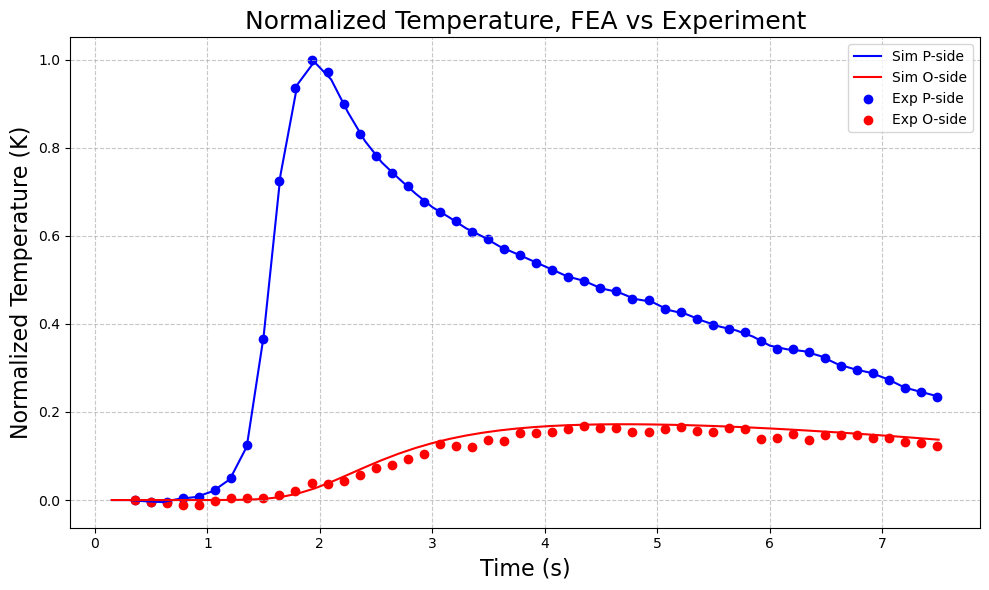

In [30]:
df_sim = pd.read_csv('outputs/testme/watcher_points.csv')
norm_factor = df_sim['pside'].max() - df_sim['pside'].min()
df_sim['pside normed'] = (df_sim['pside'] - df_sim['pside'].iloc[0]) / norm_factor
df_sim['oside normed'] = (df_sim['oside'] - df_sim['oside'].iloc[0]) / norm_factor

df1['pside normed'] = (df1['temp'] - df1['temp'].iloc[0]) / norm_factor
df1['oside normed'] = (df1['oside'] - df1['oside'].iloc[0]) / norm_factor

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df_sim['time']*10**6, df_sim['pside normed'], label='Sim P-side', color='blue', markersize=5)
ax.plot(df_sim['time']*10**6, df_sim['oside normed'], label='Sim O-side', color='red', markersize=5)
ax.scatter(df1['time']*10**6, df1['pside normed'], label='Exp P-side', color='blue', marker='o')
ax.scatter(df1['time']*10**6, df1['oside normed'], label='Exp O-side', color='red', marker='o')
ax.set_xlabel('Time (s)', fontsize=16)
ax.set_ylabel('Normalized Temperature (K)', fontsize=16)
ax.set_title('Normalized Temperature, FEA vs Experiment', fontsize=18)
ax.legend()
ax.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()